# Data Prep

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
train.head()

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,...,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label
0,49274,30.0,1590.0,0.0,1.0,195.666667,179.666667,107.0,305.0,158.333333,...,0.000000,94.716668,104.716668,0.0,2.0,2.0,6.0,NaN,658.0,0
1,38068,30.0,2410.0,0.0,1.0,521.166667,489.666667,599.0,1036.0,730.766667,...,53.333333,-189.929226,-29.929226,27.0,1.0,1.0,NaN,166.0,3705.0,0
2,69335,30.0,1719.0,0.0,1.0,136.000000,108.333333,87.0,174.0,168.916667,...,0.000000,41.217949,252.217949,0.0,1.0,5.0,340.0,NaN,606.0,0
3,185293,12.0,0.0,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,...,0.000000,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0,0
4,143469,30.0,799.0,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,...,0.000000,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0,0


In [3]:
train.fillna(0.0, inplace=True)
train.head()

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,...,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label
0,49274,30.0,1590.0,0.0,1.0,195.666667,179.666667,107.0,305.0,158.333333,...,0.000000,94.716668,104.716668,0.0,2.0,2.0,6.0,0.0,658.0,0
1,38068,30.0,2410.0,0.0,1.0,521.166667,489.666667,599.0,1036.0,730.766667,...,53.333333,-189.929226,-29.929226,27.0,1.0,1.0,0.0,166.0,3705.0,0
2,69335,30.0,1719.0,0.0,1.0,136.000000,108.333333,87.0,174.0,168.916667,...,0.000000,41.217949,252.217949,0.0,1.0,5.0,340.0,0.0,606.0,0
3,185293,12.0,0.0,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,...,0.000000,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0,0
4,143469,30.0,799.0,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,...,0.000000,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0,0


In [4]:
trainX = train.drop(columns=['Label'])
trainY = train['Label']
rows_count = len(trainY)
rows_count

129987

In [5]:
features = trainX.columns.tolist()

for name in features:
    print(name + ": " + str(trainX[name].nunique()))
    if trainX[name].nunique() == rows_count:
        features.remove(name)

Unnamed: 0: 129987
F_1: 27582
F_2: 3363
F_3: 231
F_4: 4623
F_5: 2670
F_6: 1126
F_7: 1950
F_8: 47372
F_9: 1261
F_10: 104
F_11: 3
F_12: 1306
F_13: 147
F_14: 280
F_15: 886
F_16: 1316
F_17: 2013
F_18: 2493
F_19: 1063
F_20: 1824
F_21: 43922
F_22: 3163
F_23: 554
F_24: 1918
F_25: 819
F_26: 5482
F_27: 572
F_28: 46
F_29: 77
F_30: 3399
F_31: 8101
F_32: 4932
F_33: 119479
F_34: 121583
F_35: 31
F_36: 49
F_37: 70
F_38: 365
F_39: 365
F_40: 3481


In [6]:
features

['F_0',
 'F_1',
 'F_2',
 'F_3',
 'F_4',
 'F_5',
 'F_6',
 'F_7',
 'F_8',
 'F_9',
 'F_10',
 'F_11',
 'F_12',
 'F_13',
 'F_14',
 'F_15',
 'F_16',
 'F_17',
 'F_18',
 'F_19',
 'F_20',
 'F_21',
 'F_22',
 'F_23',
 'F_24',
 'F_25',
 'F_26',
 'F_27',
 'F_28',
 'F_29',
 'F_30',
 'F_31',
 'F_32',
 'F_33',
 'F_34',
 'F_35',
 'F_36',
 'F_37',
 'F_38',
 'F_39',
 'F_40']

In [7]:
def show_correlations(df, show_chart = True, figsize=(25, 17), columns_unused=[]):
    fig = plt.figure(figsize = figsize)
    mask = np.tril(df.corr())
    corr = np.round(df.loc[:, ~df.columns.isin(columns_unused)].corr(), 3)
    if show_chart == True:
        sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='YlGnBu', mask=mask)
    return corr

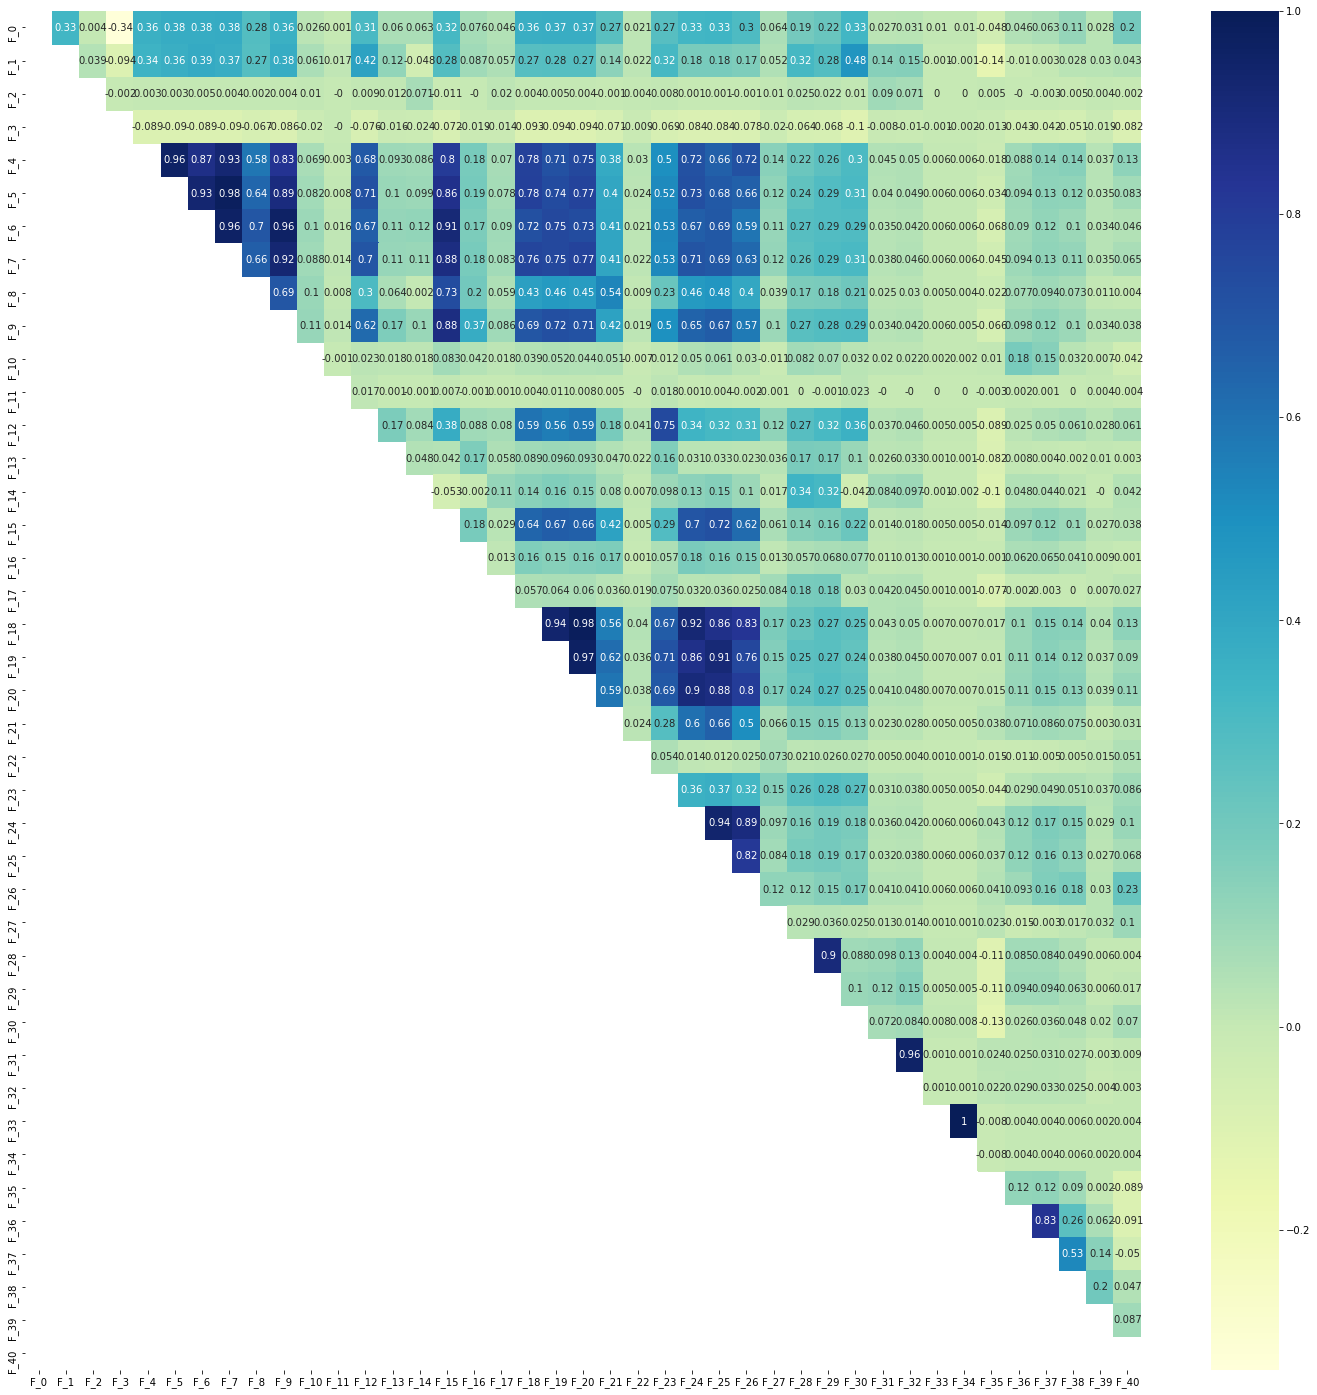

In [8]:
correlation_df = show_correlations(trainX[features], show_chart=True, figsize=(25, 25))

In [9]:
columns_to_drop = set()
for name in correlation_df.columns:
    if name in columns_to_drop:
        continue
    for i, v in correlation_df[name].items():
        if i == name:
            continue
        if v > 0.7:
            print(name, i, v)
            columns_to_drop.add(i)

F_4 F_5 0.959
F_4 F_6 0.869
F_4 F_7 0.925
F_4 F_9 0.834
F_4 F_15 0.802
F_4 F_18 0.776
F_4 F_19 0.715
F_4 F_20 0.753
F_4 F_24 0.717
F_4 F_26 0.717
F_8 F_15 0.734
F_12 F_5 0.713
F_12 F_23 0.746
F_25 F_15 0.718
F_25 F_18 0.859
F_25 F_19 0.914
F_25 F_20 0.884
F_25 F_24 0.94
F_25 F_26 0.817
F_28 F_29 0.902
F_31 F_32 0.957
F_33 F_34 1.0
F_36 F_37 0.835


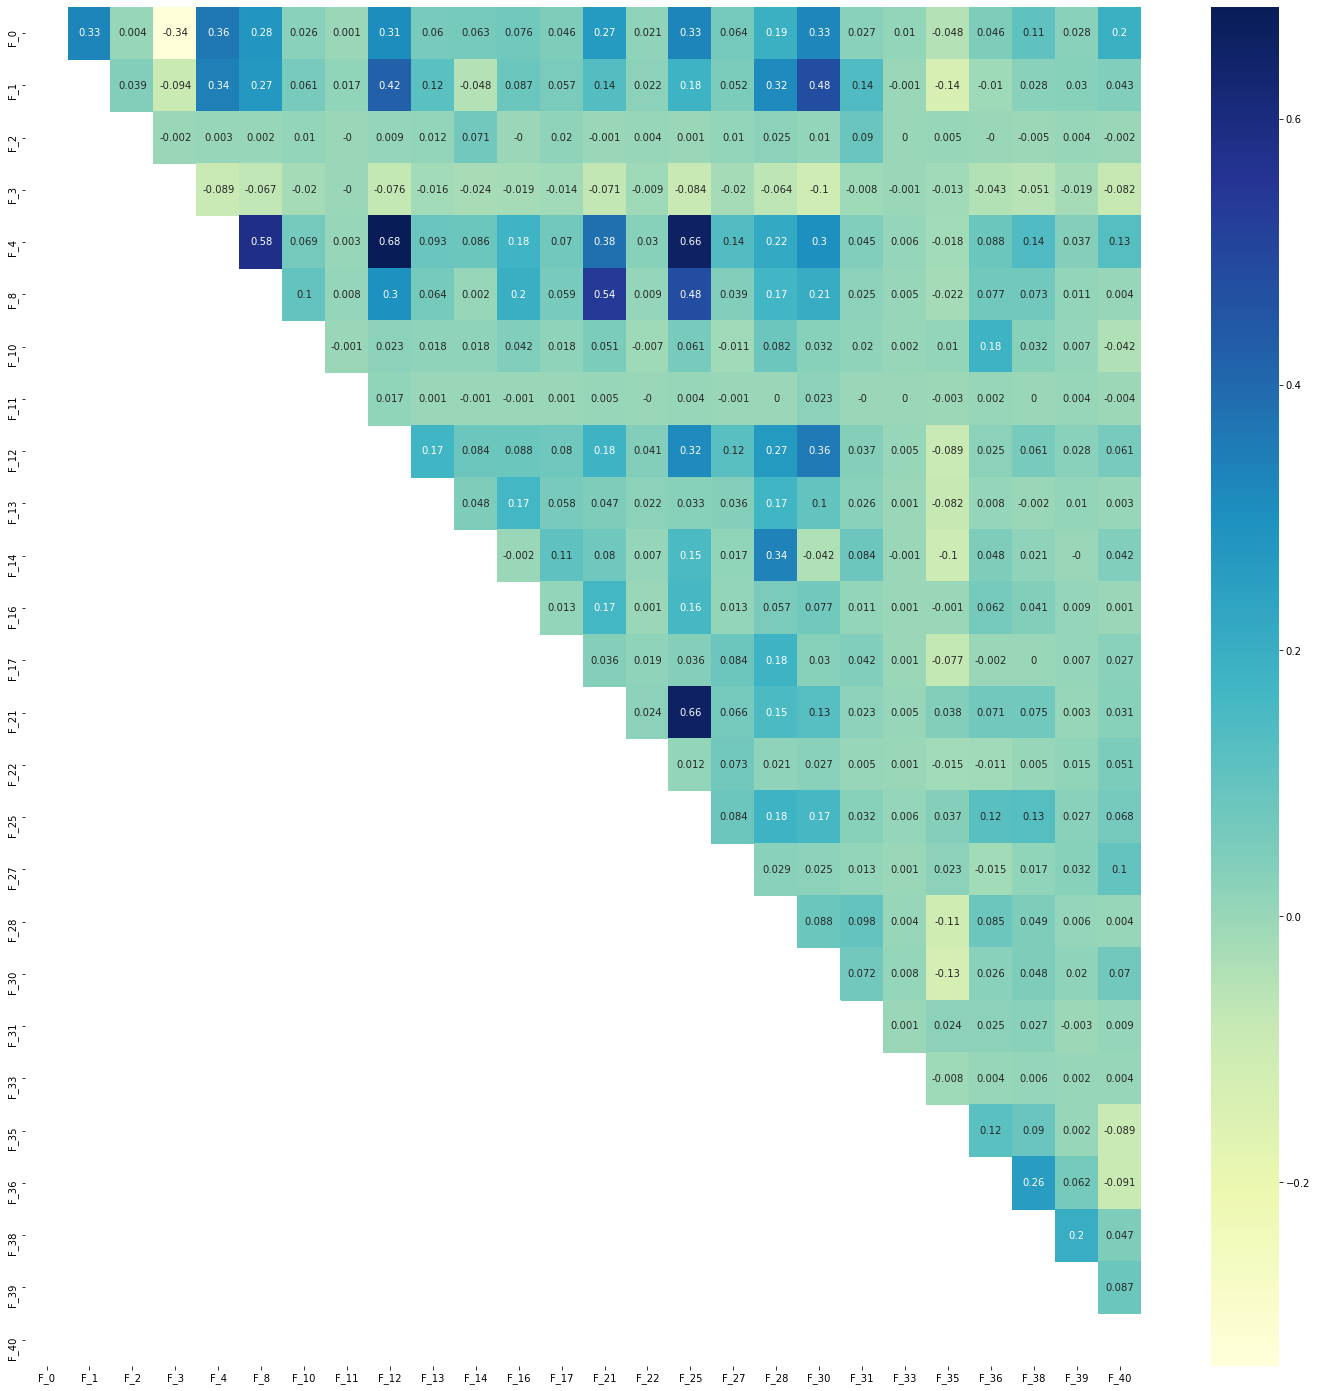

In [10]:
for col in list(columns_to_drop):
    features.remove(col)

correlation_df = show_correlations(trainX[features], show_chart=True, figsize=(25, 25))

# After tests improvements

In [11]:
small_impact_calls = ['F_2', 'F_3', 'F_13', 'F_10']
for col in small_impact_calls:
    features.remove(col)

# Models

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, roc_auc_score

def gini(y_true, y_pred):
    return 2 * roc_auc_score(y_true, y_pred) - 1

def lift(y_true, y_pred, lift_perc):
    cutoff = np.percentile(y_pred, 100 - lift_perc)
    return y_true[y_pred >= cutoff].mean() / y_true.mean()

In [13]:
lasso = Lasso()
cv = RepeatedKFold()
MSEs = cross_val_score(lasso, trainX[features], trainY, scoring='neg_mean_absolute_error', cv=cv)
MSEs = np.absolute(MSEs)
print('Mean MAE: %.3f (%.3f)' % (np.mean(MSEs), np.std(MSEs)))

Mean MAE: 0.065 (0.001)


In [14]:
lasso.fit(trainX[features], trainY)

Lasso()

In [15]:
preds = lasso.predict(trainX[features])
accuracy = accuracy_score(trainY.values, (preds >= 0.5).astype(int))
g = gini(trainY.values, preds)
l = lift(trainY.values, preds, 10)
print(accuracy, g, l)

0.966011985813966 0.3297252527139287 2.47164961082252


In [16]:
counts = trainY.value_counts(1)
class_weight = {0: 1, 1: counts[0]/counts[1]}
print(counts, class_weight, counts[0]/counts[1])

0    0.966012
1    0.033988
Name: Label, dtype: float64 {0: 1, 1: 28.422136713444996} 28.422136713444996


In [17]:
trainX[features].head()

,F_0,F_1,F_4,F_8,F_11,F_12,F_14,F_16,F_17,F_21,...,F_27,F_28,F_30,F_31,F_33,F_35,F_36,F_38,F_39,F_40
0,30.0,1590.0,195.666667,158.333333,0.0,95.333333,0.0,19.0,0.0,174.816667,...,9.0,1.0,1700.0,2.5,94.716668,0.0,2.0,6.0,0.0,658.0
1,30.0,2410.0,521.166667,730.766667,0.0,150.666667,0.0,10.0,0.0,1105.733333,...,34.0,2.0,2570.0,50.0,-189.929226,27.0,1.0,0.0,166.0,3705.0
2,30.0,1719.0,136.000000,168.916667,0.0,46.000000,0.0,3.0,0.0,189.400000,...,15.0,1.0,1930.0,0.0,41.217949,0.0,1.0,340.0,0.0,606.0
3,12.0,0.0,27.500000,5.416667,0.0,1.666667,0.0,6.0,0.0,22.550000,...,0.0,0.0,50.0,2.5,1.166614,30.0,3.0,354.0,354.0,467.0
4,30.0,799.0,6.500000,4.033333,0.0,0.333333,0.0,0.0,0.0,8.583333,...,0.0,0.0,0.0,0.0,-11082.129032,30.0,1.0,208.0,288.0,446.0


In [18]:
# lg = lgbm.LGBMClassifier(class_weight=class_weight, silent=True, verbosity=-1)
# param_dist = {'max_depth': [25,50,75],
#               'learning_rate' : [0.01,0.05,0.1],
#               'num_leaves': [300,900,1200],
#               'n_estimators': [200, 300, 500],
#               'subsample': [0.1, 0.5, 1.0],
#               'min_split_gain': [0.0, 10.0, 25.0],
#               'reg_alpha': [0.1, 0.5, 1.0]
#              }
# grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
# grid_search.fit(trainX[features], trainY)
# grid_search.best_estimator_

In [19]:
lgbmc = lgbm.LGBMClassifier(class_weight=class_weight, silent=True, verbosity=-1)
lgbmc.set_params(**{
    'num_leaves': 31,
    'learning_rate': 0.05,
    'n_estimators': 350,
    'min_split_gain': 2.5,
    'min_child_samples': 25,
    'subsample': 0.8,
    'subsample_freq': 25,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.001,
    'reg_lambda': 0.01
})

lgbmc.fit(trainX[features], trainY)

LGBMClassifier(class_weight={0: 1, 1: 28.422136713444996}, colsample_bytree=0.9,
               learning_rate=0.05, min_child_samples=25, min_split_gain=2.5,
               n_estimators=350, reg_alpha=0.001, reg_lambda=0.01,
               subsample=0.8, subsample_freq=25, verbosity=-1)

In [20]:
preds = lgbmc.predict_proba(trainX[features])[:, 1]
accuracy = accuracy_score(trainY.values, (preds >= 0.7).astype(int))
g = gini(trainY.values, preds)
l = lift(trainY.values, preds, 10)
print(accuracy, g, l)

0.9312315846969312 0.8196326014340349 6.29056113167827


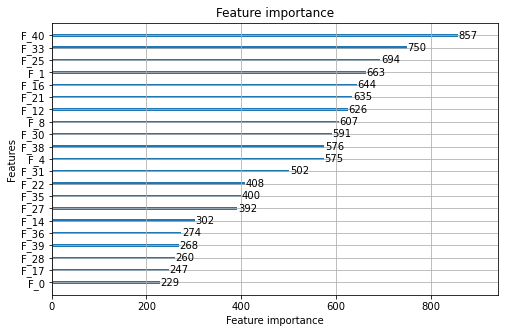

In [21]:
max_num_features = len(features)

fig, ax = plt.subplots(figsize=(8, 5))
lgbm.plot_importance(lgbmc, max_num_features=max_num_features, ax=ax)
plt.show()

In [22]:
test = pd.read_csv('./test.csv')
test_df = test[features].fillna(0.0)
test_df.head()

,F_0,F_1,F_4,F_8,F_11,F_12,F_14,F_16,F_17,F_21,...,F_27,F_28,F_30,F_31,F_33,F_35,F_36,F_38,F_39,F_40
0,30.0,1690.0,0.500000,0.000000,0.0,0.333333,0.0,2.0,0.0,0.000000,...,0.0,1.0,1900.0,0.000000,194.800000,0.0,2.0,179.0,179.0,122.0
1,30.0,2710.0,289.666667,218.450000,0.0,198.333333,0.0,49.0,0.0,80.200000,...,0.0,3.0,2910.0,126.666667,1.066618,20.0,4.0,254.0,0.0,323.0
2,30.0,1690.0,189.333333,268.866667,0.0,52.000000,8.0,0.0,0.0,316.233333,...,8.0,1.0,1730.0,3.333333,120.279593,28.0,3.0,127.0,0.0,763.0
3,30.0,1603.0,213.500000,399.866667,0.0,86.000000,0.0,1.0,0.0,459.100000,...,6.0,2.0,2850.0,65.833333,-281.033344,17.0,5.0,233.0,0.0,701.0
4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [23]:
test_preds = lgbmc.predict_proba(test_df)[:, 1]
test_preds

array([0.03474204, 0.7681384 , 0.13704597, ..., 0.69580314, 0.16723672,
       0.62445541])

In [24]:
result = test.rename(columns={'Unnamed: 0': 'ID'})
result['PRED'] = test_preds
result = result[['ID', 'PRED']]

In [25]:
result.head()

,ID,PRED
0,16380,0.034742
1,145630,0.768138
2,112658,0.137046
3,102310,0.676623
4,158200,0.680897


In [26]:
result.to_csv('result.csv', index=False)